<h2>허프 변환 원 검출</h2>
허프변환의 상세한 내용은 **hough_line.ipynb**를 읽어보세요

원에 대하여 허프변환을 사용하려면 너무나도 많은 시간과 리소스가 낭비됨.
    따라서 원을 검출할 때에는, 허프 그래디언트 방법을 사용함.
    
    허프 그래디언트는 다음과 같은 순서로 진행됨
    
    1. 영상에 존재하는 모든 원의 중심 좌표 찾기
    2. 검출된 원의 중심으로부터 적합한 반지름을 구함
    
 ![img](./img/hough_circle/circle.png)
     
     OpenCV에서는 HoughCircles()를 사용하여 허프 원 검출을 사용할 수 있음.
     
     다만 이전 직선 검출들과는 다르게 함수가 자체적으로 에지를 구하는 기능이 있어서 그레이스케일 이미지를
     전달해야함.
     
     공식 API 문서에서는 다음과 같은 인자들을 사용할 수 있다고 함
     
 ![img](./img/hough_circle/circle_opencv.png)

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def two_img_show(fir_img,fir_name,sec_img,sec_name):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(fir_img, cv2.COLOR_BGR2RGB))
    ax1.set_title(fir_name)
    ax1.axis("off")

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(cv2.cvtColor(sec_img, cv2.COLOR_BGR2RGB))
    ax2.set_title(sec_name)
    ax2.axis("off")

    plt.show()

In [6]:
#이미지를 그레이스케일 이미지로 불러옴

origin_img = cv2.imread('./img/hough_circle/coin.jpg')
img_gray = cv2.imread('./img/hough_circle/coin.jpg',cv2.IMREAD_GRAYSCALE)

In [7]:
#불러온 그레이 스케일 이미지를 가우시안 블러로 잡음을 제거한 후, 함수에 넣음
gaussianblur_img = cv2.GaussianBlur(img_gray, (0, 0), 1)
circles = cv2.HoughCircles(gaussianblur_img,cv2.HOUGH_GRADIENT,1,50,200,500)
circles = circles[0]

circles[0]
#(x,y,radius)

array([604.5, 491.5, 177.9], dtype=float32)

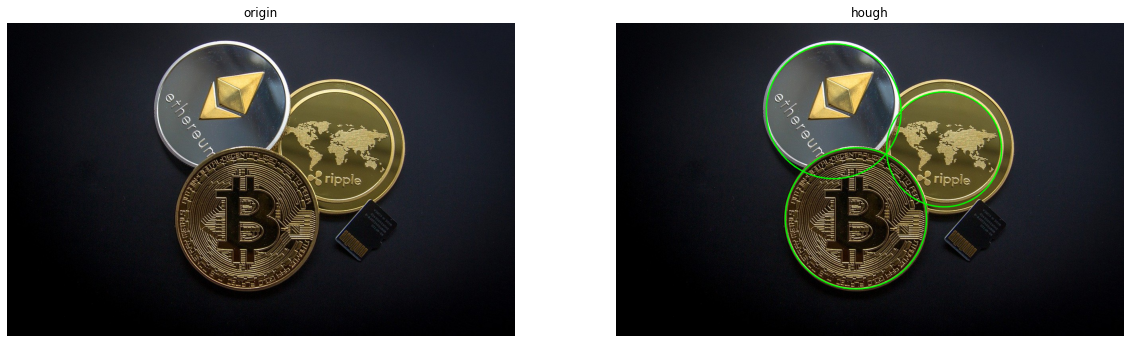

In [8]:
hough_circle_img = origin_img.copy()
for circle in circles:
    center = (round(circle[0]),round(circle[1]))
    rad = round(circle[2])
    cv2.circle(hough_circle_img,center,rad,(0,255,0),2,cv2.LINE_AA)
    
two_img_show(origin_img,'origin',hough_circle_img,'hough')